In [1]:
# Standard library imports
import os

# Third party library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
BLINDED_FILE_PATH = "../datasets/TASK_2/TASK_2/blinded_test_set.csv"
blinded_test_data = pd.read_csv(BLINDED_FILE_PATH)

<Axes: >

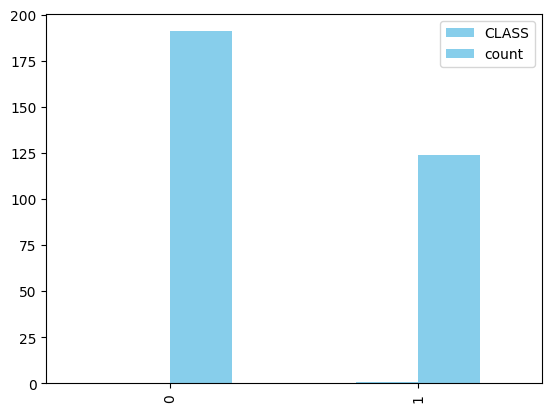

In [3]:
# Reading the csv file
FILE_PATH = "../datasets/TASK_2/TASK_2/train_set.csv"
train_data = pd.read_csv(FILE_PATH)
train_labels = train_data['CLASS'].value_counts().reset_index()
train_labels.plot(kind="bar", color="skyblue")

<Axes: xlabel='CLASS'>

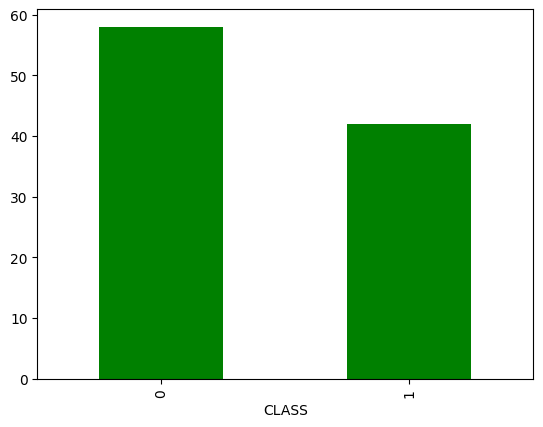

In [4]:
TEST_PATH = "../datasets/TASK_2/TASK_2/test_set.csv"
test_data = pd.read_csv(TEST_PATH)
test_labels = test_data['CLASS'].value_counts()
test_labels.plot(kind="bar", color="green")

In [5]:
X_test = test_data.drop(columns=["ID", "CLASS"])
y_test = test_data["CLASS"]

In [6]:
X_train = train_data.drop(columns=["ID", "CLASS"])
y_train = train_data["CLASS"]

<Axes: >

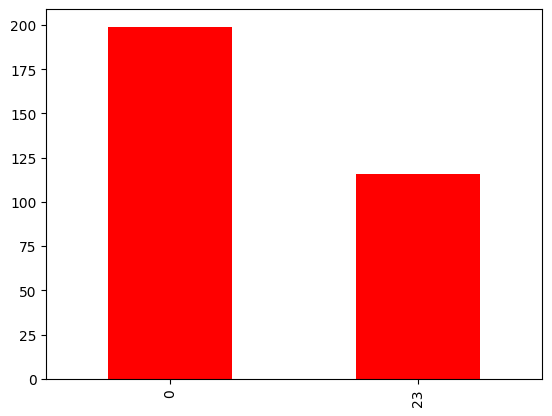

In [7]:
# Check for null values
missing_per_row = X_train.isna().sum(axis=1)
missing_per_row = missing_per_row.value_counts()
missing_per_row.plot(kind="bar", color="red")

<Axes: >

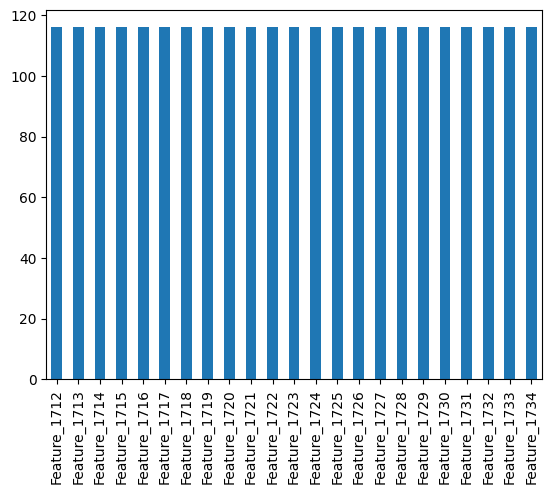

In [8]:
missing_per_column = X_train.isna().sum(axis=0)
missing_per_column = missing_per_column[missing_per_column > 0]
missing_per_column.plot(kind="bar")

Text(0.5, 1.0, 'Data types of the features')

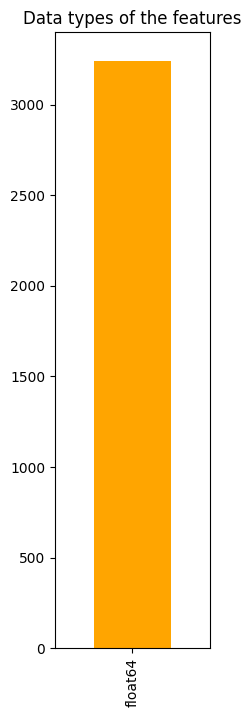

In [9]:
plt.figure(figsize=(2, 8))
feature_dtypes = X_train.dtypes.value_counts()
feature_dtypes.plot(kind="bar", color="orange")
plt.title("Data types of the features")

C:\Users\ameer\AppData\Local\Temp\ipykernel_10740\755666365.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(X_train.iloc[:, 50:60],


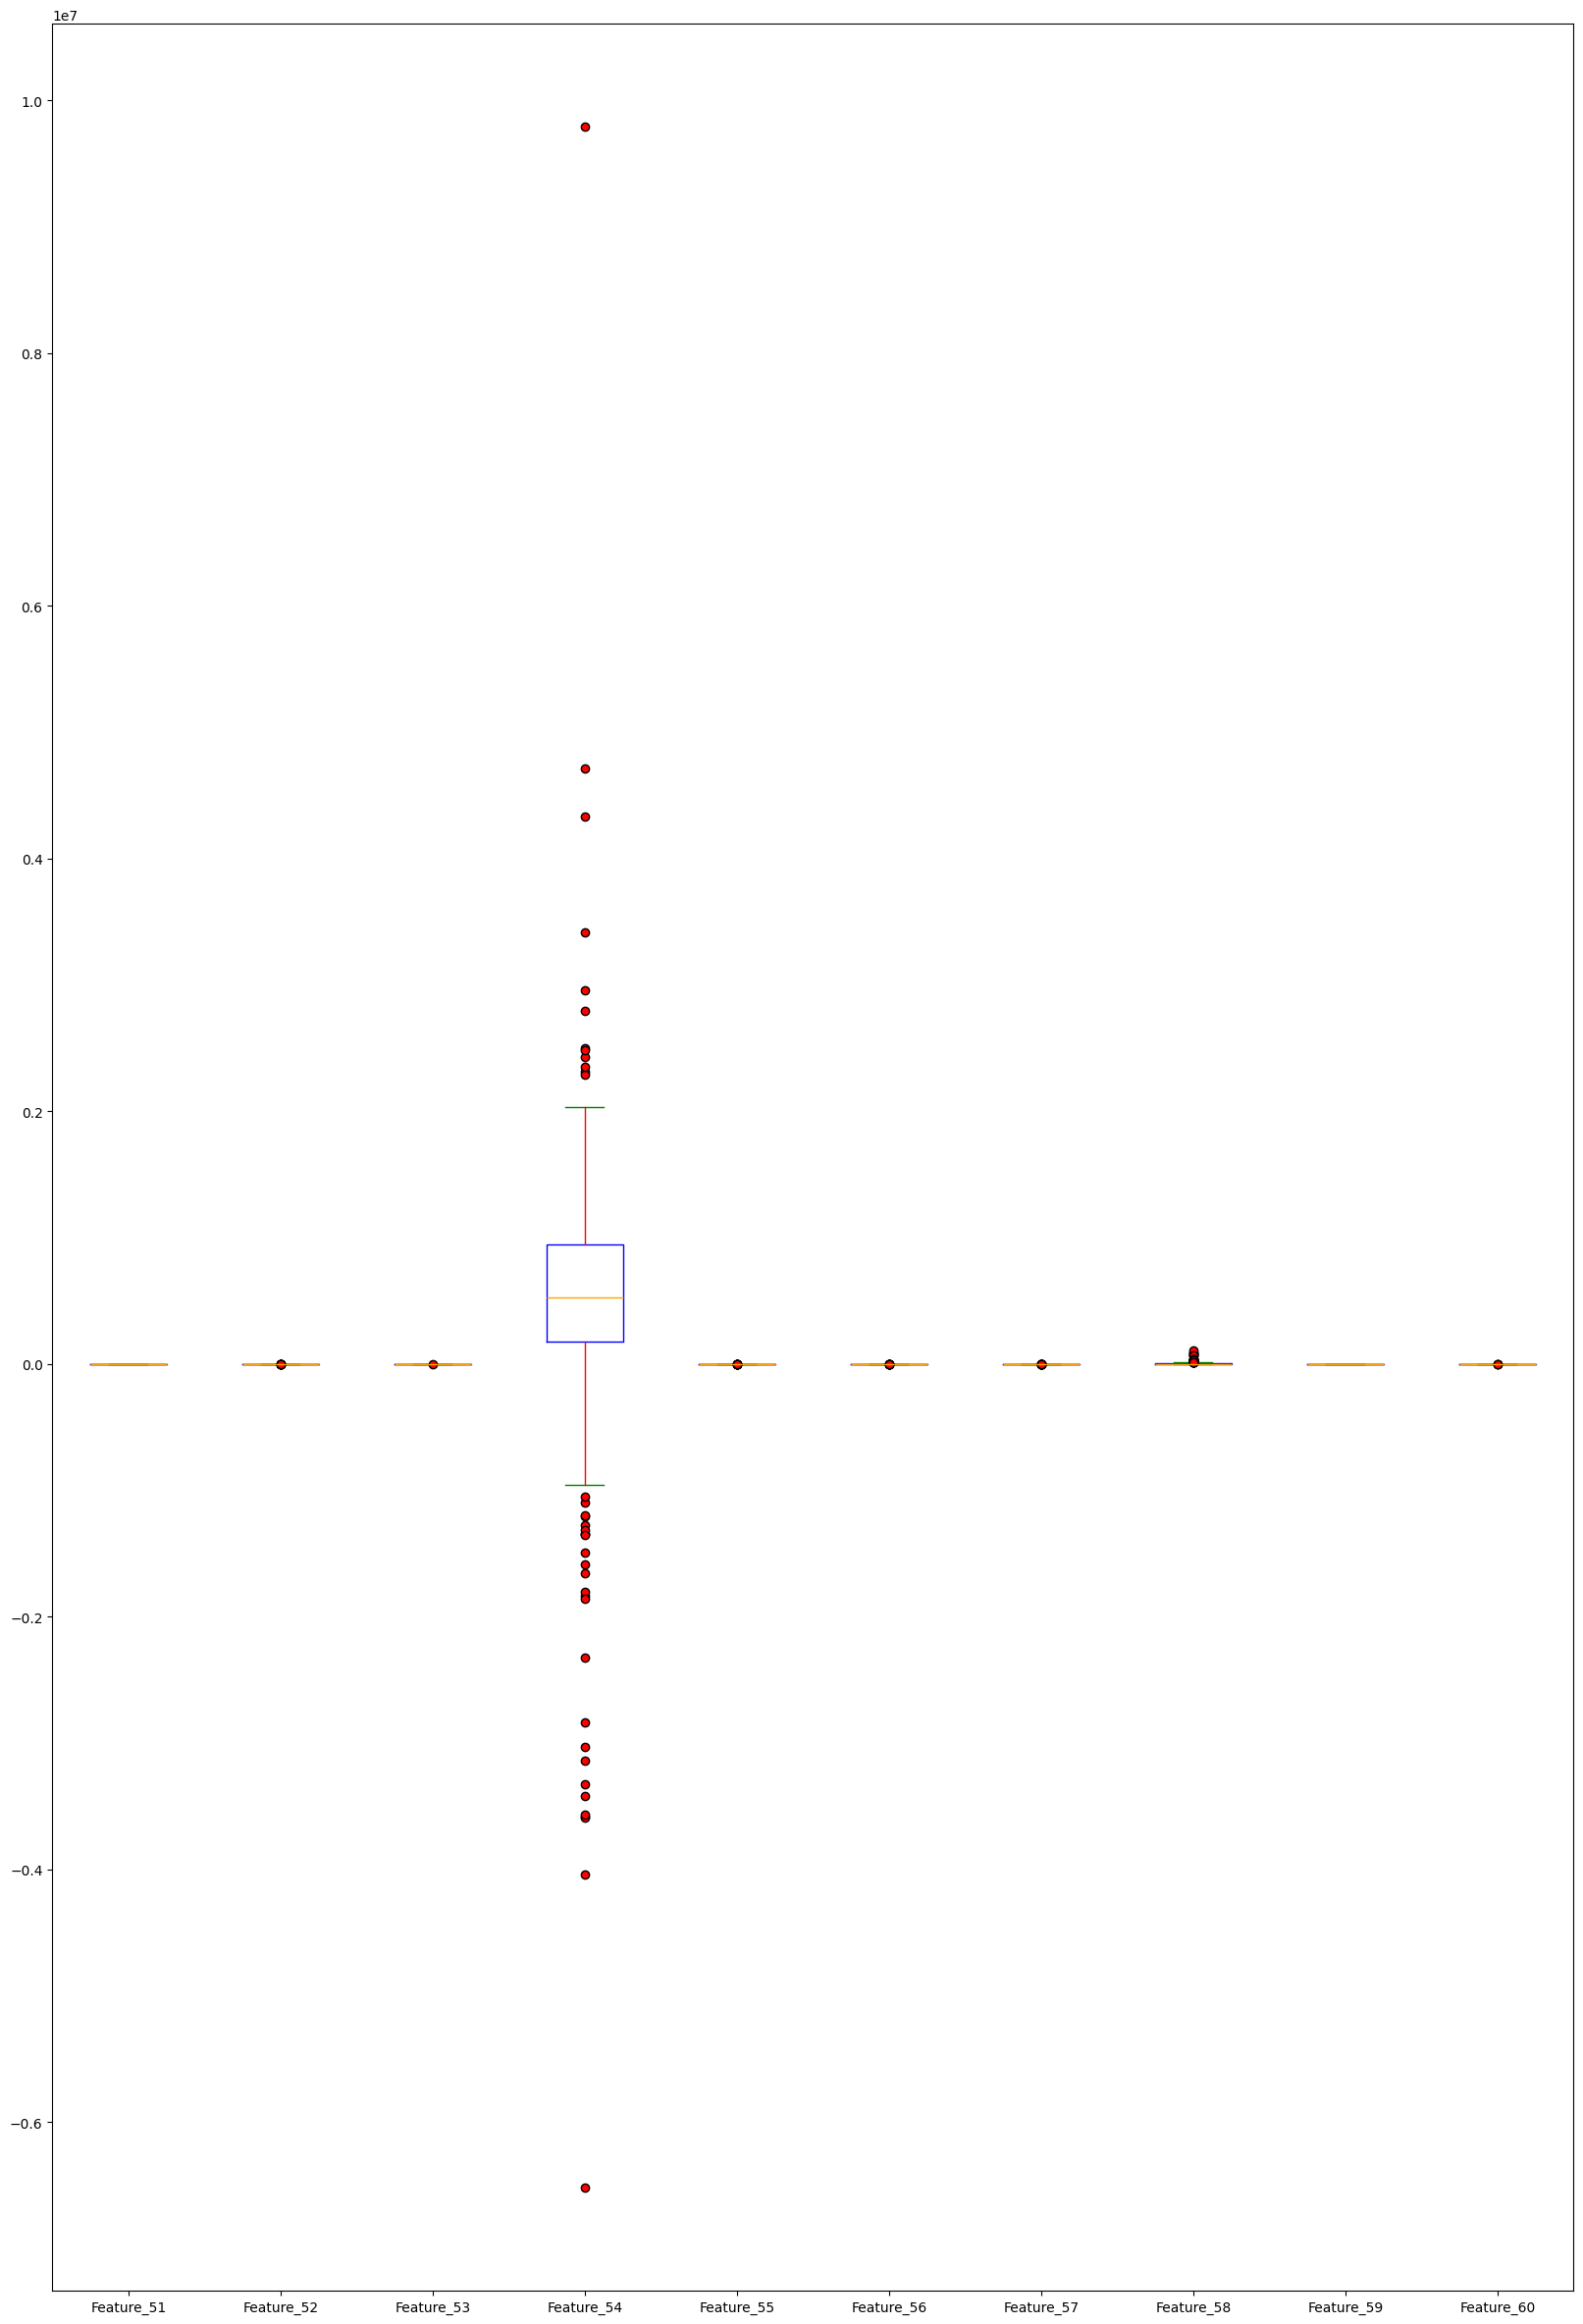

In [10]:
plt.figure(figsize=(20, 30))
plt.boxplot(X_train.iloc[:, 50:60], 
            positions=range(50, 60, 1), 
            labels=X_train.iloc[:, 50:60].columns.to_list(),
            boxprops=dict(color='blue'), 
            whiskerprops=dict(color='red'), 
            capprops=dict(color='green'), 
            medianprops=dict(color='orange'), 
            flierprops=dict(markerfacecolor='red', marker='o'))
plt.show()
plt.show()

In [11]:
train_data.select_dtypes(include=['number']).columns

Index(['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
       'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10',
       ...
       'Feature_3230', 'Feature_3231', 'Feature_3232', 'Feature_3233',
       'Feature_3234', 'Feature_3235', 'Feature_3236', 'Feature_3237',
       'Feature_3238', 'CLASS'],
      dtype='object', length=3239)

In [12]:
train_dist= train_data["CLASS"].value_counts(normalize=True)
test_dist = test_data["CLASS"].value_counts(normalize=True)
dist_diff = abs(train_dist - test_dist).sum()
if dist_diff > 0.1:
    print(f"Warning: There is a large distribution difference: {dist_diff:.3f}")
else:
    print(f"Distribution difference is acceptable: {dist_diff:.3f}")


Distribution difference is acceptable: 0.053


In [13]:
y_train.isna().sum()

np.int64(0)

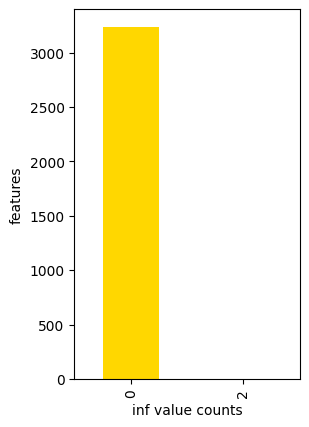

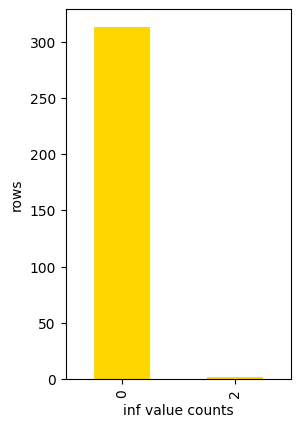

In [14]:
import numpy as np

# Count infinities
inf_per_feature = np.isinf(X_train).sum(axis=0).value_counts()
plt.subplot(1, 2, 1)
inf_per_feature.plot(kind="bar", color="gold")
plt.xlabel("inf value counts")
plt.ylabel("features")
plt.show()

inf_per_row = np.isinf(X_train).sum(axis=1).value_counts()
plt.subplot(1, 2, 2)
inf_per_row.plot(kind="bar", color="gold")
plt.xlabel("inf value counts")
plt.ylabel("rows")
plt.show()


<BarContainer object of 2 artists>

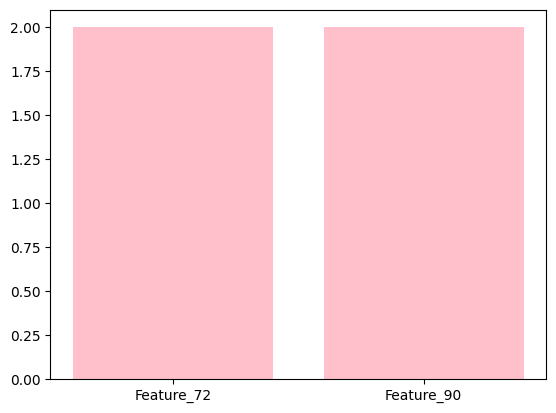

In [15]:
inf_mask = np.isinf(X_train)
inf_summary = inf_mask.sum(axis=0)
features = inf_summary[inf_summary > 0].index.to_list()
plt.bar(features, height=inf_summary[inf_summary > 0].values, color="pink")

In [16]:
X_clean = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

In [17]:
from sklearn.impute import SimpleImputer, KNNImputer

imputer = SimpleImputer(missing_values=np.nan, strategy="median")
X_imputed = imputer.fit_transform(X_clean)
X_test = imputer.transform(X_test)

knn_imputer = KNNImputer(n_neighbors=5)
X_imputed_knn = knn_imputer.fit_transform(X_clean.to_numpy())
X_test_knn = knn_imputer.transform(X_test)

In [18]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(y_train)
print('Before', counter)

smt = SMOTE(random_state=42)
X_train_sampled, y_train_sampled = smt.fit_resample(X_imputed_knn, y_train)

counter = Counter(y_train_sampled)
print('After', counter)


Before Counter({0: 191, 1: 124})
After Counter({0: 191, 1: 191})


In [19]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

scalar = RobustScaler()
X_scaled = scalar.fit_transform(X_train_sampled)
X_test = scalar.transform(X_test_knn)

In [20]:
# scalar.mean_, scalar.var_

In [21]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test, columns=X_train.columns)
X_scaled_df

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_3229,Feature_3230,Feature_3231,Feature_3232,Feature_3233,Feature_3234,Feature_3235,Feature_3236,Feature_3237,Feature_3238
0,-0.730613,-0.730965,-0.667166,1.631187,-0.385341,-0.343592,0.442532,-0.398477,0.442532,18.716237,...,-1.634955,-1.634955,-0.757029,0.0,-0.634534,-0.964512,0.0,-0.196995,1.246179,-0.964512
1,-0.651621,-0.654864,-0.835219,0.296092,0.783869,0.832773,-0.687899,0.765634,-0.687899,0.173434,...,-0.153283,-0.153283,-0.637780,0.0,-0.414777,-0.296650,0.0,-0.325539,0.377087,-0.296650
2,-0.320303,-0.320121,-0.244985,0.701486,-0.344470,-0.308800,0.391619,-0.355563,0.391619,-0.498091,...,-0.855933,-0.855933,-0.334219,0.0,-0.412419,-0.802531,0.0,-0.342683,0.924579,-0.802531
3,0.350464,0.350598,0.617113,0.410500,-0.830173,-0.696938,1.066405,-0.876604,1.066405,-0.602311,...,-0.448742,-0.448742,0.387338,0.0,0.031581,-0.568641,0.0,-0.362622,0.662396,-0.568641
4,0.320120,0.318706,0.077785,-0.679453,0.348319,0.340529,-0.347589,0.349287,-0.347589,0.298774,...,0.528600,0.528600,0.270406,0.0,0.717161,0.909003,0.0,0.206261,-0.912545,0.909003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,-0.200417,-0.203600,-0.613988,-0.929573,1.728558,2.081449,-1.257266,1.623009,-1.257266,-0.619807,...,0.895752,0.895752,-0.222433,0.0,0.487124,1.445004,0.0,-0.104006,-1.165040,1.445004
378,-0.301373,-0.301037,-0.167900,0.863370,-0.506690,-0.443064,0.603723,-0.527523,0.603723,4.104345,...,-0.774105,-0.774105,-0.300587,0.0,-0.342773,-0.644634,0.0,0.719909,0.817960,-0.644634
379,0.855092,0.852976,0.580941,-0.879296,0.108990,0.110307,-0.102210,0.107816,-0.102210,2.080764,...,0.860826,0.860826,0.916281,0.0,1.393383,1.040508,0.0,-1.149886,-1.076831,1.040508
380,-0.273174,-0.274689,-0.399916,-0.036313,0.375520,0.385145,-0.344017,0.370404,-0.344017,0.166308,...,0.062867,0.062867,-0.240883,0.0,-0.052013,0.107473,0.0,0.031050,-0.144642,0.107473


In [22]:
X_scaled_imputed = X_scaled_df.isna().sum(axis=0)
X_scaled_imputed = X_scaled_imputed[X_scaled_imputed > 0]
X_scaled_imputed

Series([], dtype: int64)

(array([  1.,   2.,   5.,  42., 126., 123.,  53.,  23.,   4.,   3.]),
 array([-3.55748008, -2.86138422, -2.16528836, -1.4691925 , -0.77309664,
        -0.07700078,  0.61909508,  1.31519094,  2.0112868 ,  2.70738266,
         3.40347852]),
 <BarContainer object of 10 artists>)

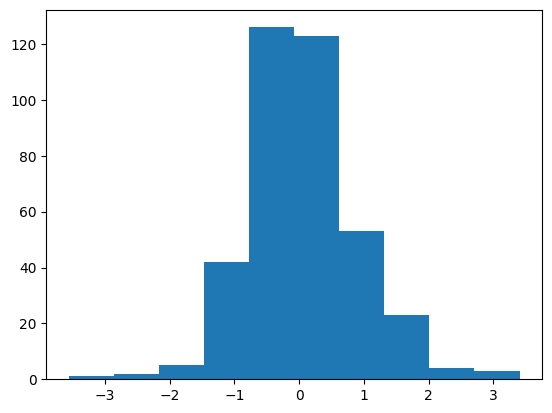

In [23]:
plt.hist(X_scaled_df["Feature_4"])

C:\Users\ameer\AppData\Local\Temp\ipykernel_10740\2728764659.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(X_scaled_df.iloc[:, 50:60],


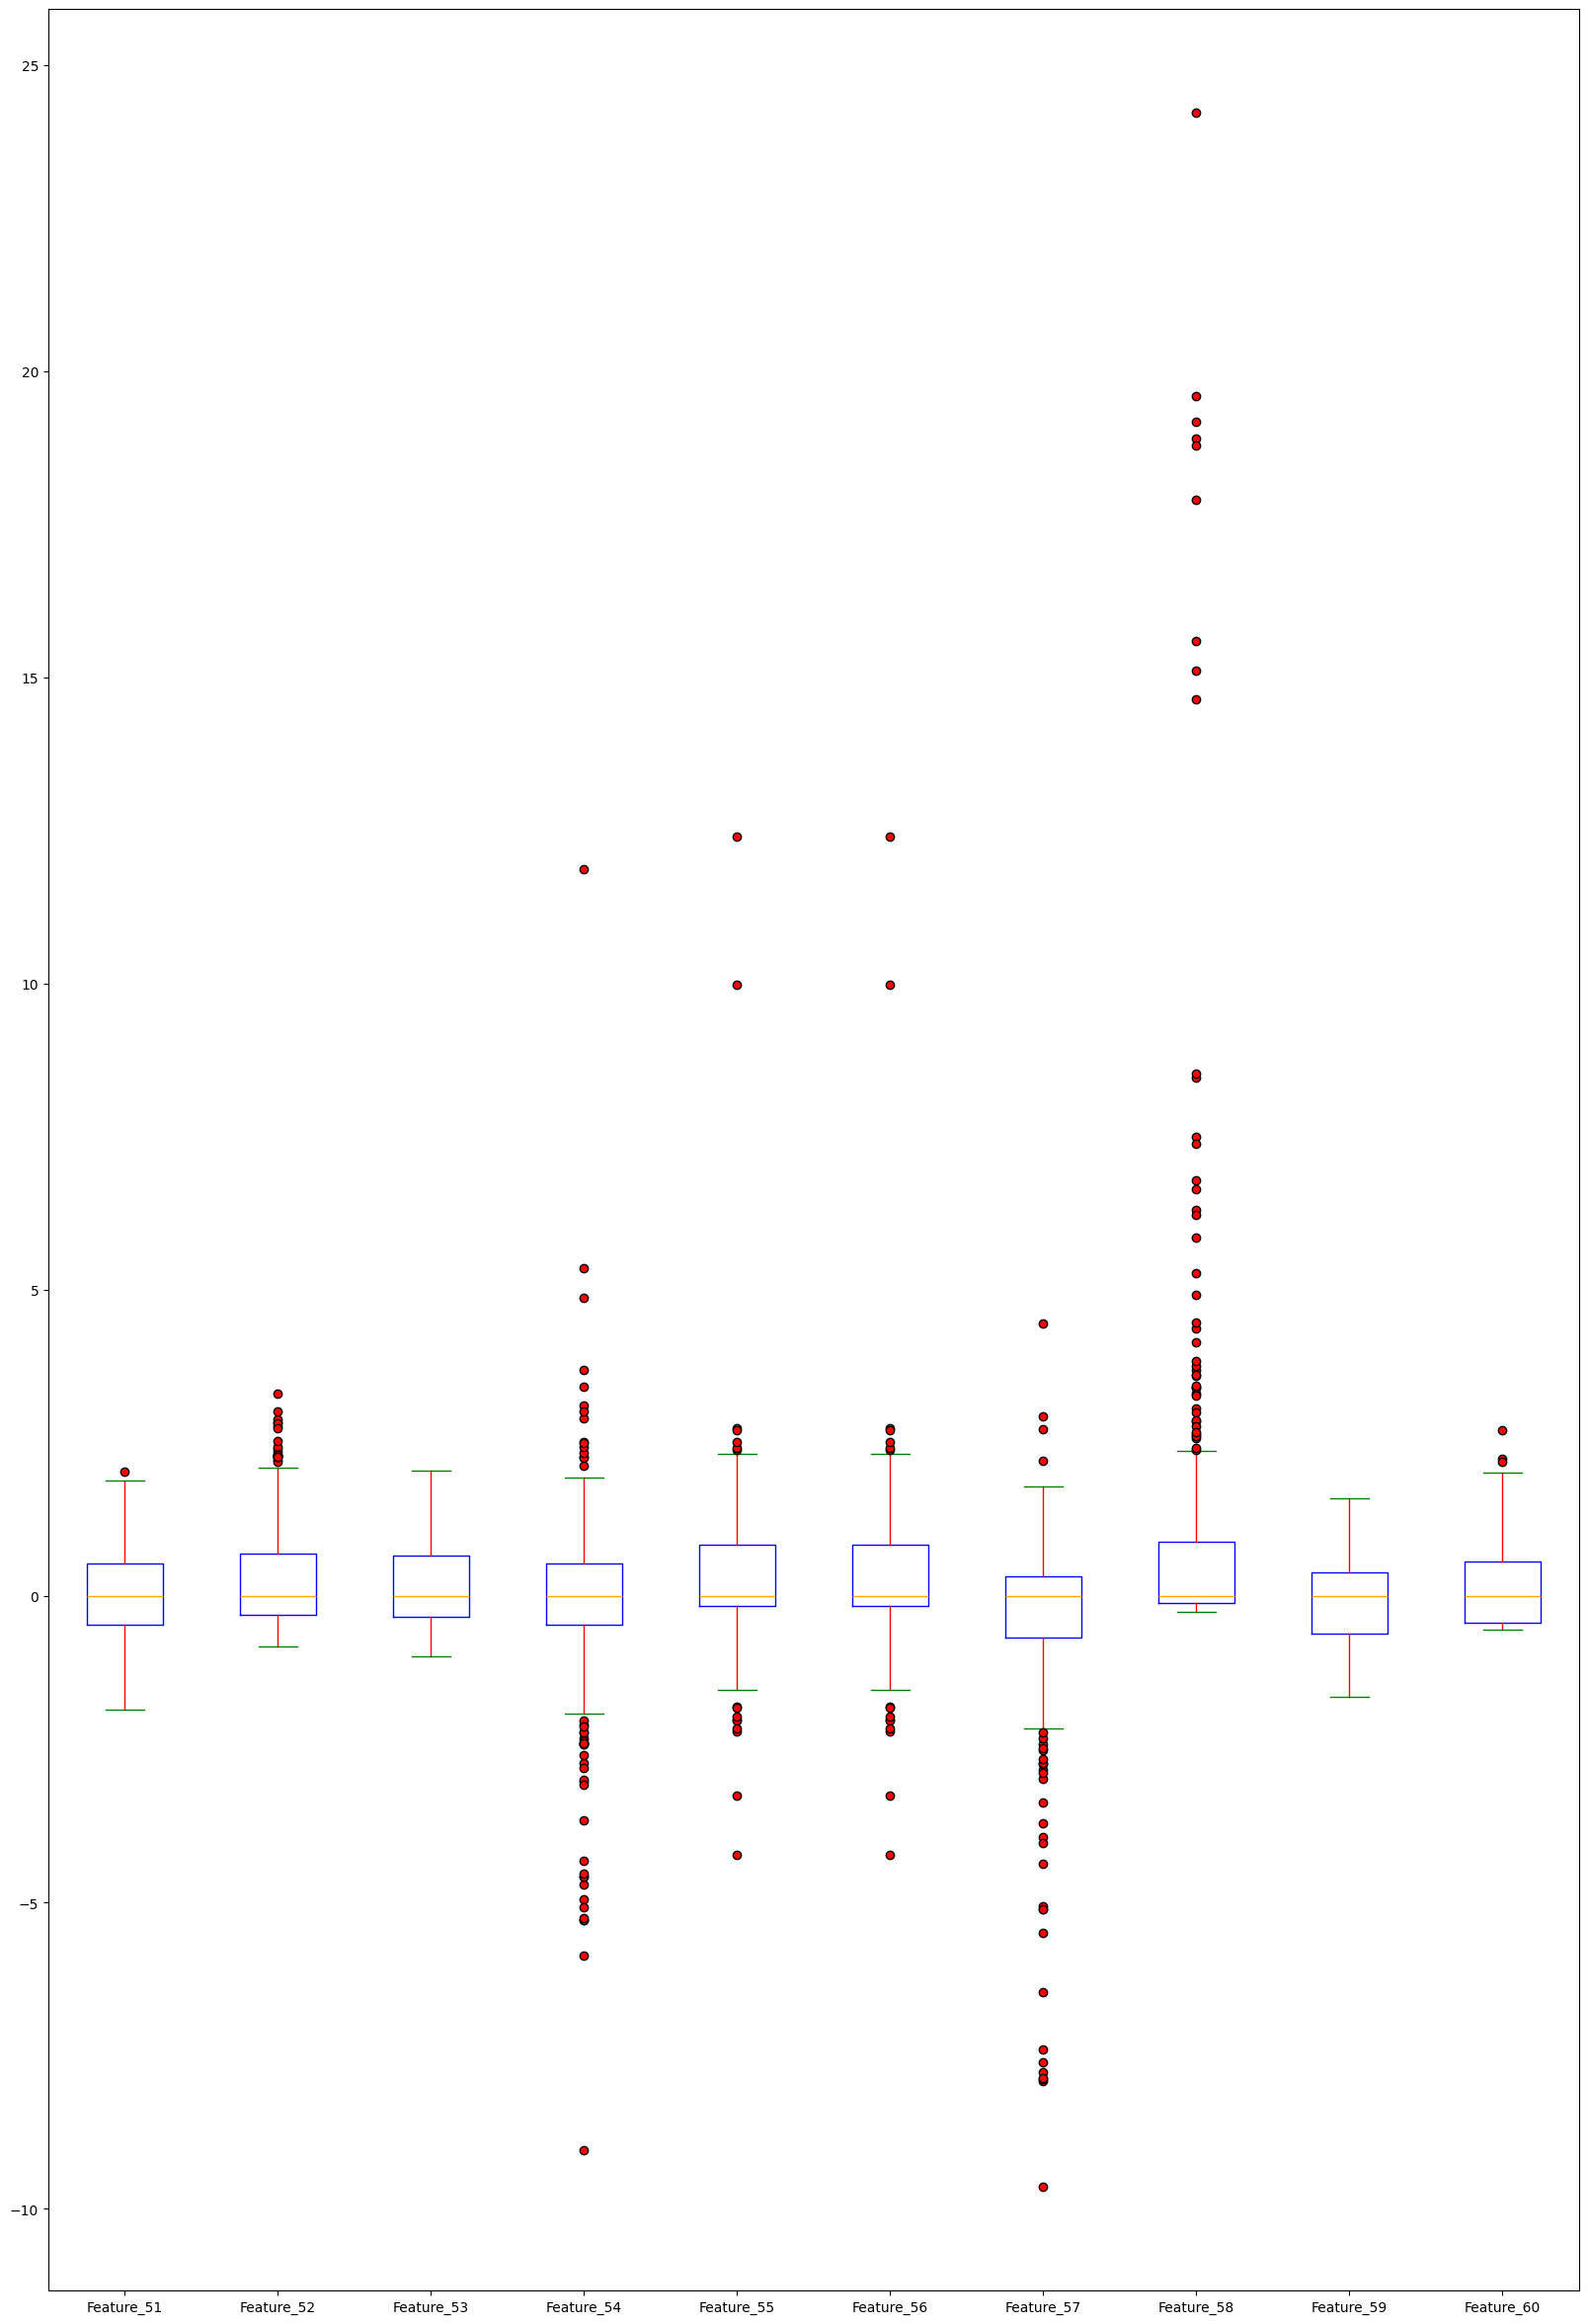

In [24]:
plt.figure(figsize=(20, 30))
plt.boxplot(X_scaled_df.iloc[:, 50:60], 
            positions=range(50, 60, 1), 
            labels=X_scaled_df.iloc[:, 50:60].columns.to_list(),
            boxprops=dict(color='blue'), 
            whiskerprops=dict(color='red'), 
            capprops=dict(color='green'), 
            medianprops=dict(color='orange'), 
            flierprops=dict(markerfacecolor='red', marker='o'))
plt.show()
plt.show()

In [25]:
feature_columns = X_train.columns

In [26]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)
X_var = selector.fit_transform(X_scaled_df)
X_test = selector.transform(X_test)


print(f"Reduced from {X_scaled_df.shape[1]} to {X_var.shape[1]} features")

selected_mask = selector.get_support()

selected_features = [feature_columns[i] for i in range(len(selected_mask)) if selected_mask[i]]

Reduced from 3238 to 3092 features


In [27]:
X_var_df = pd.DataFrame(X_var, columns=selected_features)
X_test = pd.DataFrame(X_test, columns=selected_features)

In [28]:
corr_matrix = X_var_df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
X_uncorrelated = X_var_df.drop(columns=to_drop, axis=1)

In [29]:
X_test = X_test.drop(columns=to_drop, axis=1)
X_test

,Feature_1,Feature_3,Feature_4,Feature_5,Feature_10,Feature_11,Feature_13,Feature_14,Feature_15,Feature_16,...,Feature_3191,Feature_3195,Feature_3196,Feature_3204,Feature_3207,Feature_3211,Feature_3220,Feature_3222,Feature_3223,Feature_3236
0,-0.862960,-1.130716,0.244707,1.625098,-0.803866,-1.319053,-1.223185,-0.860238,-0.813053,0.519620,...,0.153218,-0.395035,0.773919,0.406274,0.427083,-0.773217,0.645125,-0.901548,0.672126,0.850300
1,-0.673115,-0.855622,0.298048,0.788129,-0.522693,-1.192705,-0.750880,-0.763961,0.339518,0.383030,...,0.301156,-0.146972,-0.079981,0.997473,0.142624,0.787145,0.807733,0.207948,0.740729,1.825501
2,0.027328,0.088093,0.224520,-0.351990,2.582678,0.438413,-0.132903,0.154064,-1.036399,-0.589413,...,0.518238,1.219686,-0.152352,0.436834,0.477963,0.681789,0.588359,0.130748,0.307628,0.181987
3,0.541209,0.411519,-0.524347,-0.078367,-0.614530,0.429179,0.197784,-0.014437,-0.326466,-0.524901,...,-0.622401,-0.278563,-0.525115,-0.837772,-0.716834,-0.265515,-0.766446,0.840814,-0.483987,-0.519324
4,0.135263,-0.124697,-0.653703,0.541484,-0.536178,-0.042390,-0.647186,0.811098,-1.143780,0.586996,...,-0.316107,-0.263591,-0.368723,-0.090169,-0.766509,-0.326357,-0.529621,1.150972,-0.554773,-0.166560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.333216,0.334755,-0.151993,-0.296477,0.006177,-0.145378,-0.551116,0.609083,-0.944616,0.451462,...,-0.151789,0.922310,-0.644945,0.559287,-0.241624,0.316520,0.355883,0.482226,0.193181,1.152446
96,0.587612,0.275625,-0.891885,0.356893,-0.107821,0.001119,-0.316580,0.553379,-0.644484,0.306475,...,-0.546424,-1.184392,-0.078679,-0.009088,-0.519713,-0.313046,-0.054465,1.225430,-0.658189,-0.226407
97,0.449242,0.532867,-0.050038,-0.505721,-0.005797,1.012807,0.197272,-0.250257,-0.775655,-0.963004,...,-0.351562,-0.755683,0.413471,-0.913695,-0.178666,-1.056948,-0.668455,-0.678112,-0.101430,-0.839882
98,-0.231935,-0.308396,0.096967,0.124438,-0.353263,0.059998,0.149385,-0.848650,-0.253103,-1.095668,...,-0.532671,-0.622805,-0.372709,-0.606515,-0.419753,0.098349,-0.432740,0.864940,-0.060650,-0.022250


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=50, random_state=42)
clf_rf.fit(X_uncorrelated, y_train_sampled)
print(clf_rf.feature_importances_)

model = SelectFromModel(clf_rf, prefit=True)
X_new = model.transform(X_test, feature_columns=X_test.columns)
print(X_new.shape)

selected_mask = selector.get_support()
selected_rfe_features = [feature_columns[i] for i in range(len(selected_mask)) if selected_mask[i]]



[8.88737920e-04 1.01022078e-03 5.79793490e-04 2.00255305e-03
 1.18688101e-03 1.04879126e-03 6.95969777e-04 1.80746427e-03
 1.09725628e-03 7.56711799e-04 1.78144136e-03 7.76507504e-04
 8.67093505e-04 1.50110766e-03 1.64214141e-03 2.29834969e-03
 2.97409739e-03 0.00000000e+00 3.65296669e-03 0.00000000e+00
 5.75272829e-04 1.80258484e-03 4.51526146e-03 9.91738323e-04
 6.23686987e-04 2.66939732e-04 9.76501059e-04 8.55681274e-04
 1.80896789e-03 4.01907472e-04 2.25475113e-03 1.01174881e-03
 2.27888606e-03 1.65153598e-03 1.28416944e-03 1.90391315e-03
 2.81665421e-03 1.49270849e-03 1.40080675e-04 1.17497399e-03
 5.77115977e-04 1.24051885e-03 1.16707741e-03 9.21855447e-04
 1.53884865e-03 3.14251006e-04 6.81748793e-04 8.46115955e-04
 8.36746399e-04 1.79629788e-03 5.44435559e-04 1.94392114e-04
 1.01066900e-03 2.05464401e-03 9.53445709e-04 9.72630928e-04
 0.00000000e+00 2.75905883e-03 0.00000000e+00 6.47870140e-04
 8.14517142e-04 1.95548243e-04 2.29300644e-03 1.39650508e-04
 1.05101099e-03 5.660394

d:\classifier-algorithms\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [31]:
len(selected_rfe_features)

286

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

models_config = {

    'Logistic Regression': {

        'model': LogisticRegression(random_state=42, max_iter=2000),
        'params': {
            'C': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'saga']
        }
    },

    'Random Forest': {

        'model': RandomForestClassifier(random_state=42, n_estimators=100),
        'params':{
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 5, 10, 15, 20],
            'min_samples_split': [2, 5, 10, 20],
            'min_samples_leaf': [1, 2, 4, 8],
            'max_features': ['sqrt', 'log2', 0.3, 0.5]
        }
    },

    'Gradient Boosting': {

        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'subsample': [0.8, 0.9, 1.0],
            'min_samples_split': [2, 5, 10]
        }

    }

}

In [31]:
models_config

{'Logistic Regression': {'model': LogisticRegression(max_iter=2000, random_state=42),
  'params': {'C': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100],
   'penalty': ['l1', 'l2'],
   'solver': ['liblinear', 'saga']}}}

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = dict()

for name, config in models_config.items():

    print(f"Training {name}...")
    grid_search = GridSearchCV(estimator=config['model'], param_grid=config['params'], cv=cv, n_jobs=-1, scoring='accuracy', verbose=0)
    grid_search.fit(X_uncorrelated, y_train)
    models[name] = {
            'model': grid_search.best_estimator_,
            'best_params': grid_search.best_params_,
            'cv_score': grid_search.best_score_
        }   

    if name in models: 
        print(f"Best CV Score: {models[name]["cv_score"]:.4f}")
        print(f"Best Parameters: {models[name]["best_params"]}")

Training Logistic Regression...


Best CV Score: 0.6127
Best Parameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}


In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

results = {}

for name, model_info in models.items():
    model = model_info['model']

    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    accuracy = accuracy_score(y_test, y_pred)

    results[name] = {

        'accuracy': accuracy,
        'cv_score': model_info['cv_score'],
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

    print(f"\n{name}:")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"CV Score: {model_info['cv_score']:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    


NameError: name 'models' is not defined

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


clf_lr = LogisticRegression(max_iter=2000, C= 1, penalty='l2', solver='liblinear')
clf_lr.fit(X_uncorrelated, y_train_sampled)

y_pred_lr = clf_lr.predict(X_test)
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

[[42 16]
 [23 19]]
              precision    recall  f1-score   support

           0       0.65      0.72      0.68        58
           1       0.54      0.45      0.49        42

    accuracy                           0.61       100
   macro avg       0.59      0.59      0.59       100
weighted avg       0.60      0.61      0.60       100



In [75]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=200)
clf_rf.fit(X_uncorrelated, y_train_sampled)

y_pred_rf = clf_rf.predict(X_test)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


[[47 11]
 [25 17]]
              precision    recall  f1-score   support

           0       0.65      0.81      0.72        58
           1       0.61      0.40      0.49        42

    accuracy                           0.64       100
   macro avg       0.63      0.61      0.60       100
weighted avg       0.63      0.64      0.62       100



In [76]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_uncorrelated, y_train_sampled)

y_pred_dt = clf_dt.predict(X_test)
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


[[36 22]
 [25 17]]
              precision    recall  f1-score   support

           0       0.59      0.62      0.61        58
           1       0.44      0.40      0.42        42

    accuracy                           0.53       100
   macro avg       0.51      0.51      0.51       100
weighted avg       0.53      0.53      0.53       100



In [ ]:
# Check feature distributions

feature_drift_count = 0

for col in selected_k_features:
    train_mean = X_kbest_df[col].mean()
    test_mean = X_test[col].mean()
    train_std = X_kbest_df[col].std()

    if train_std > 0:
        z_score = (train_mean - test_mean) / train_std
        if z_score > 2:
            feature_drift_count += 1

if feature_drift_count > len(selected_k_features) * 0.2:
    print(f"Warning: {feature_drift_count} features show significant distribution drift")
else:
    print(f"Feature distributions look stable ({feature_drift_count} potential drift)")

KeyError: 'Feature_2'

In [36]:
# Check for overfitting

for name, model_info in models.items():
    model = model_info['model']
    train_pred = model.predict(X_kbest_df)
    train_acc = accuracy_score(y_train, train_pred)

    test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)

    overfitting = abs(train_acc - test_acc)
    print(f"{name}: Train Accuracy: {train_acc:.3f}, Test Accuracy: {test_acc:.3f}, Overfitting: {overfitting:.3f}")

    if overfitting > 0.1:
        print(f"Potential overfitting detected for {name} model")

Logistic Regression: Train Accuracy: 0.654, Test Accuracy: 0.610, Overfitting: 0.044
Random Forest: Train Accuracy: 1.000, Test Accuracy: 0.560, Overfitting: 0.440
Potential overfitting detected for Random Forest model
SVM: Train Accuracy: 0.698, Test Accuracy: 0.620, Overfitting: 0.078


In [39]:
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(clf, X_kbest_df, y_train, cv=kf, scoring="accuracy")

